# Explore here

In [7]:
import pandas as pd

file_path = '/workspaces/kaggle-water-prediction/data/raw/Aquifer_Auser.csv'
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Display data information
print(data.info())

# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8154 entries, 1998-03-05 to 2020-06-30
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Rainfall_Gallicano                       5295 non-null   float64
 1   Rainfall_Pontetetto                      5295 non-null   float64
 2   Rainfall_Monte_Serra                     5289 non-null   float64
 3   Rainfall_Orentano                        5295 non-null   float64
 4   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 5   Rainfall_Piaggione                       4930 non-null   float64
 6   Rainfall_Calavorno                       5295 non-null   float64
 7   Rainfall_Croce_Arcana                    5295 non-null   float64
 8   Rainfall_Tereglio_Coreglia_Antelminelli  5295 non-null   float64
 9   Rainfall_Fabbriche_di_Vallico            5295 non-null   float64
 10  Depth_to_Groundwater_LT2      

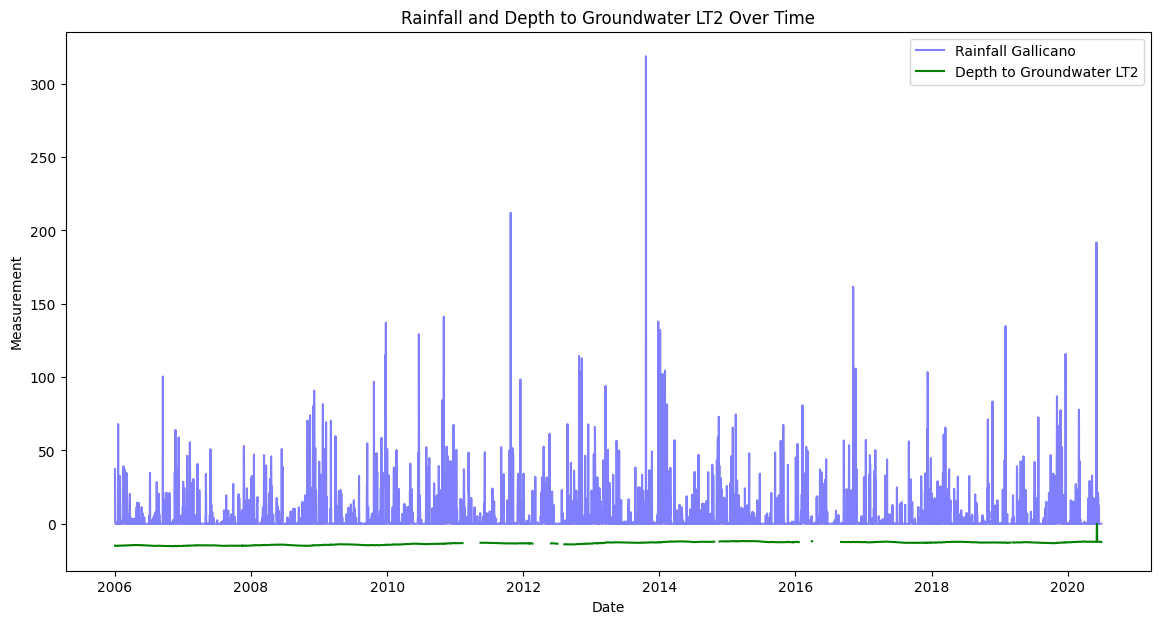

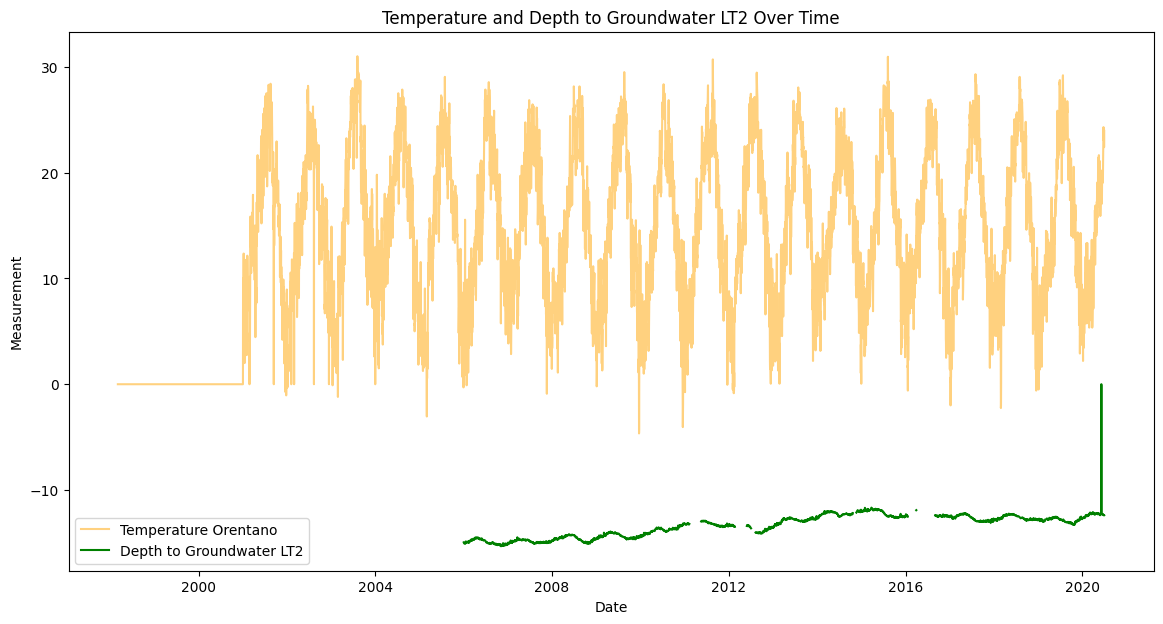

In [8]:
import matplotlib.pyplot as plt

# Plot Rainfall and Groundwater Depth
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Rainfall_Gallicano'], label='Rainfall Gallicano', color='blue', alpha=0.5)
plt.plot(data.index, data['Depth_to_Groundwater_LT2'], label='Depth to Groundwater LT2', color='green')
plt.title('Rainfall and Depth to Groundwater LT2 Over Time')
plt.xlabel('Date')
plt.ylabel('Measurement')
plt.legend()
plt.show()

# Plot Temperature and Groundwater Depth
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Temperature_Orentano'], label='Temperature Orentano', color='orange', alpha=0.5)
plt.plot(data.index, data['Depth_to_Groundwater_LT2'], label='Depth to Groundwater LT2', color='green')
plt.title('Temperature and Depth to Groundwater LT2 Over Time')
plt.xlabel('Date')
plt.ylabel('Measurement')
plt.legend()
plt.show()



In [9]:
data.fillna(method='ffill', inplace=True)
# Select features and target
features = ['Rainfall_Gallicano', 'Rainfall_Pontetetto', 'Rainfall_Monte_Serra',
            'Temperature_Orentano', 'Temperature_Monte_Serra']
target = 'Depth_to_Groundwater_LT2'

# Create feature and target datasets
X = data[features]
y = data[target]

# Split the data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


/tmp/ipykernel_701/3315668357.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


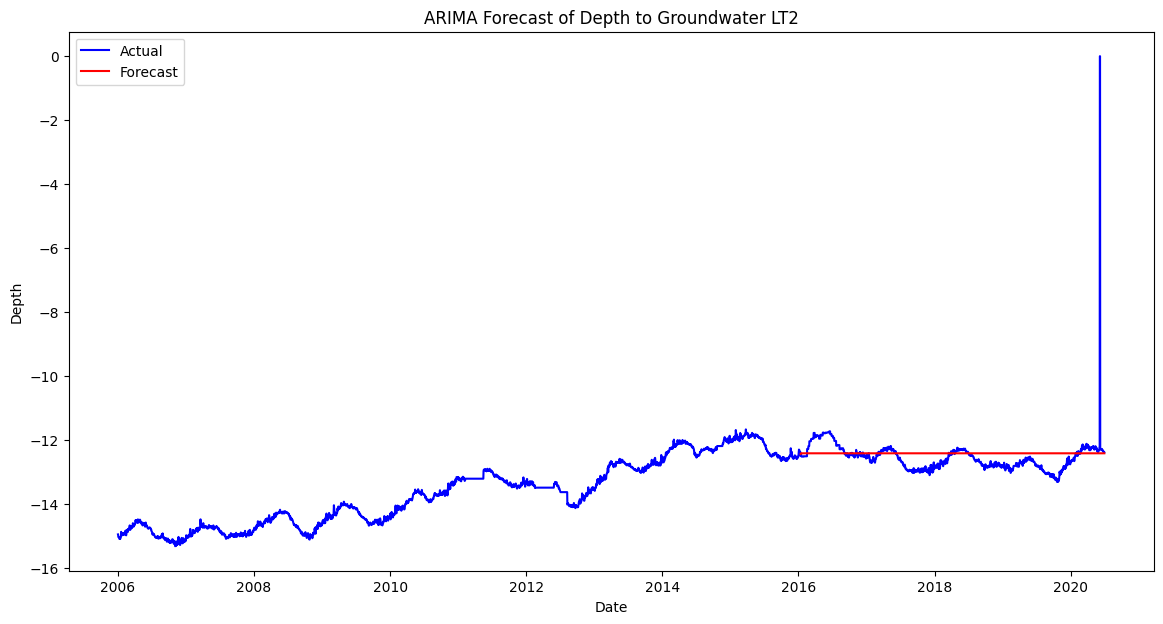

In [11]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(y_train, order=(5, 1, 0))  # (p, d, q)
arima_result = arima_model.fit()

forecast = arima_result.forecast(steps=len(y_test))
test_index = y_test.index

plt.figure(figsize=(14, 7))
plt.plot(y.index, y, label='Actual', color='blue')
plt.plot(test_index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast of Depth to Groundwater LT2')
plt.xlabel('Date')
plt.ylabel('Depth')
plt.legend()
plt.show()


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate errors
mae = mean_absolute_error(y_test, forecast)
rmse = np.sqrt(mean_squared_error(y_test, forecast))

print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Root Mean Square Error (RMSE): {rmse:.3f}')


Mean Absolute Error (MAE): 0.316
Root Mean Square Error (RMSE): 0.568
